# EDA

In [2]:
import pandas as pd

In [5]:
# df = pd.read_pickle('data-ai-slop-detector/final_detection.pkl')
df = pd.read_pickle(r'data-ai-slop-detector\final_merged_data_nlp.pkl')

In [6]:
df.columns.to_list()

['commenter_id',
 'comment_id',
 'parent_id',
 'post_id',
 'comment_content',
 'cleaned_content',
 'num_emojis',
 'num_text_emojis',
 'num_caps_words',
 'num_unicode_chars',
 'contains_media',
 'contains_link',
 'num_tagged_people',
 'tagged_grok',
 'used_slang',
 'sentiment_label',
 'sentiment_prob',
 'irony_label',
 'irony_prob',
 'hate_label',
 'hate_prob',
 'offensive_label',
 'offensive_prob',
 'help',
 'office',
 'dance',
 'money',
 'wedding',
 'domestic_work',
 'sleep',
 'medical_emergency',
 'cold',
 'hate',
 'cheerfulness',
 'aggression',
 'occupation',
 'envy',
 'anticipation',
 'family',
 'vacation',
 'crime',
 'attractive',
 'masculine',
 'prison',
 'health',
 'pride',
 'dispute',
 'nervousness',
 'government',
 'weakness',
 'horror',
 'swearing_terms',
 'leisure',
 'suffering',
 'royalty',
 'wealthy',
 'tourism',
 'furniture',
 'school',
 'magic',
 'beach',
 'journalism',
 'morning',
 'banking',
 'social_media',
 'exercise',
 'night',
 'kill',
 'blue_collar_job',
 'art',
 

In [3]:
df.columns.to_list()

['commenter_id',
 'comment_id',
 'parent_id',
 'post_id',
 'comment_content',
 'cleaned_content',
 'num_emojis',
 'num_text_emojis',
 'num_caps_words',
 'num_unicode_chars',
 'contains_media',
 'contains_link',
 'num_tagged_people',
 'tagged_grok',
 'used_slang',
 'sentiment_label',
 'sentiment_prob',
 'irony_label',
 'irony_prob',
 'hate_label',
 'hate_prob',
 'offensive_label',
 'offensive_prob',
 'help',
 'office',
 'dance',
 'money',
 'wedding',
 'domestic_work',
 'sleep',
 'medical_emergency',
 'cold',
 'hate',
 'cheerfulness',
 'aggression',
 'occupation',
 'envy',
 'anticipation',
 'family',
 'vacation',
 'crime',
 'attractive',
 'masculine',
 'prison',
 'health',
 'pride',
 'dispute',
 'nervousness',
 'government',
 'weakness',
 'horror',
 'swearing_terms',
 'leisure',
 'suffering',
 'royalty',
 'wealthy',
 'tourism',
 'furniture',
 'school',
 'magic',
 'beach',
 'journalism',
 'morning',
 'banking',
 'social_media',
 'exercise',
 'night',
 'kill',
 'blue_collar_job',
 'art',
 

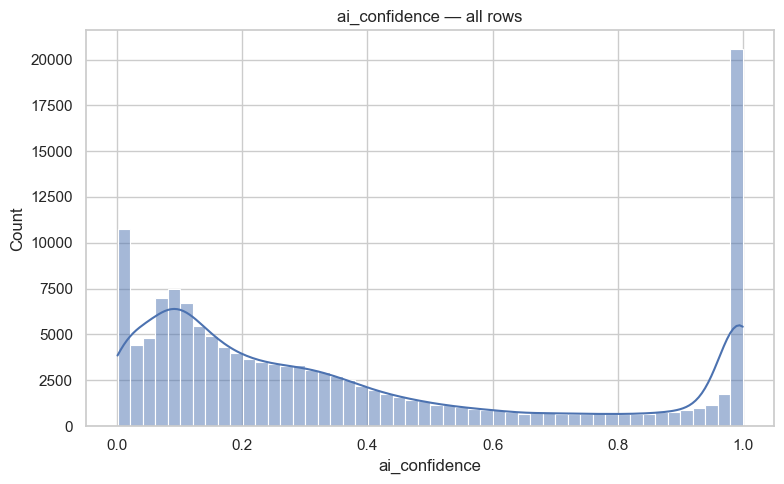

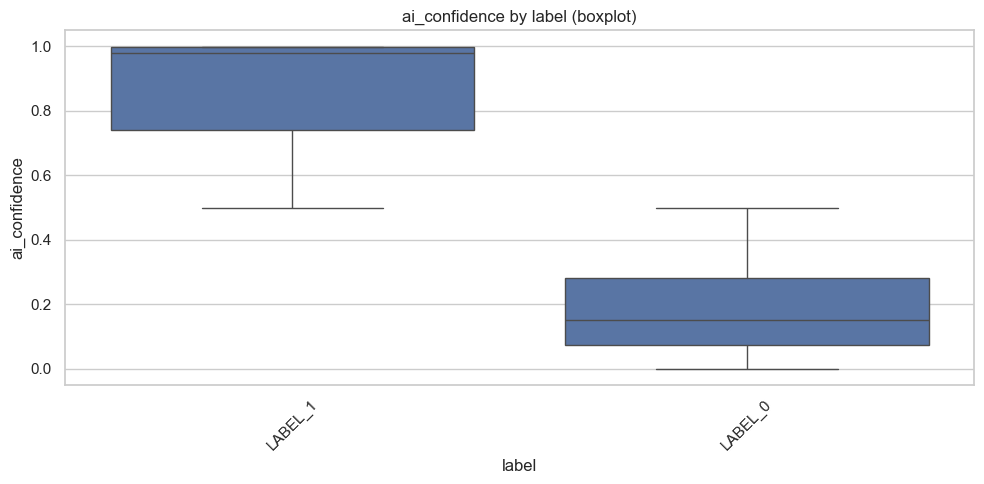

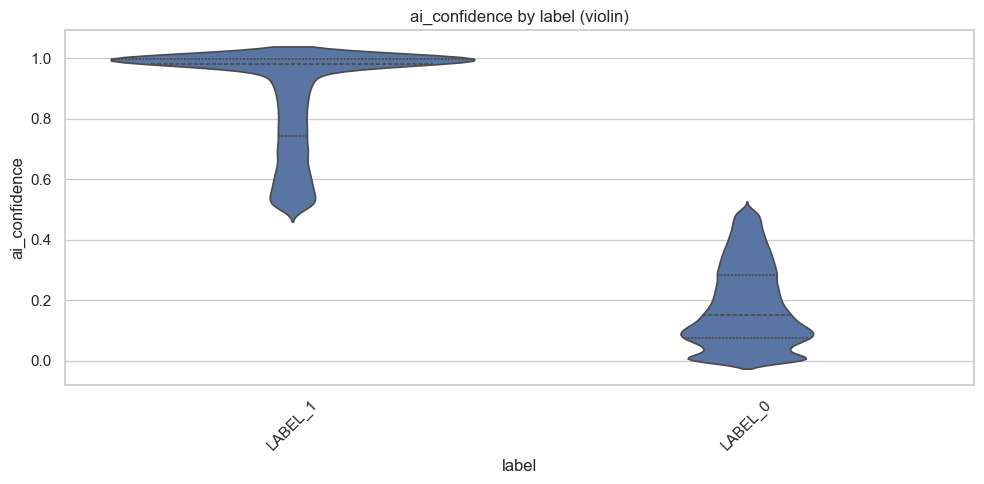

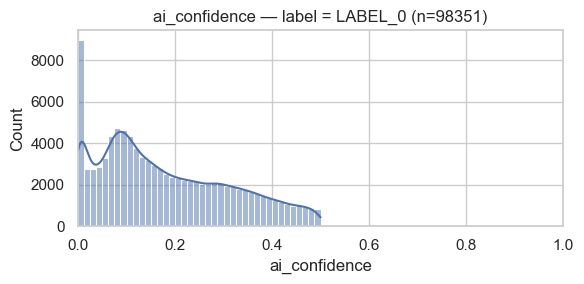

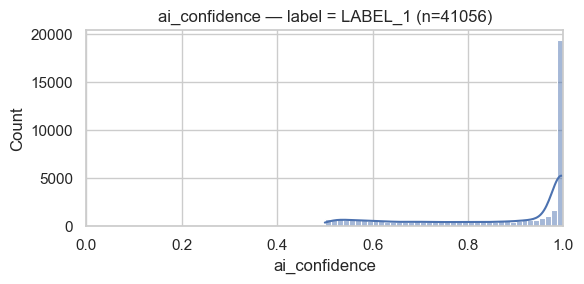

In [4]:
# plot ai_confidence distribution (overall and per label)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ensure df is loaded
# df = pd.read_pickle('data-ai-slop-detector/final_detection.pkl')

# detect possible label column
label_candidates = ['label', 'ai_label', 'detection_label', 'class', 'label_name', 'gt_label']
label_col = next((c for c in df.columns if c in label_candidates), None)

# overall distribution
plt.figure(figsize=(8,5))
sns.histplot(df['ai_confidence'].dropna(), kde=True, bins=50)
plt.title('ai_confidence — all rows')
plt.xlabel('ai_confidence')
plt.tight_layout()
plt.show()

# distribution by label (if found)
if label_col is None:
    print("No label column detected. Available columns:", df.columns.tolist())
else:
    # boxplot / violinplot to compare distributions
    plt.figure(figsize=(10,5))
    sns.boxplot(x=label_col, y='ai_confidence', data=df)
    plt.title(f'ai_confidence by {label_col} (boxplot)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,5))
    sns.violinplot(x=label_col, y='ai_confidence', data=df, inner='quartile')
    plt.title(f'ai_confidence by {label_col} (violin)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # per-label histograms
    for val in sorted(df[label_col].dropna().unique()):
        subset = df[df[label_col] == val]['ai_confidence'].dropna()
        plt.figure(figsize=(6,3))
        sns.histplot(subset, kde=True, bins=40)
        plt.title(f'ai_confidence — {label_col} = {val} (n={len(subset)})')
        plt.xlim(0,1)
        plt.tight_layout()
        plt.show()

Dataset size after cleaning: 139407 -> after ai_confidence filter: 59606
Top 20 users by comment count (column: commenter_id):
   commenter_id  comment_count
           grok            255
    Prolotari31            141
SallieMelnicoff            123
 BasedSamParker             90
      ILA_NewsX             81
moment_mirthful             67
 PatLadner51558             60
     kelllynn28             50
   Doge_maximus             48
  applealakazam             48
  Elonfansmeets             44
 GodandCountryy             41
     CollinRugg             41
     dogeai_gov             39
  Instructor980             38
SonofLiberty357             38
    Skylerbaird             37
GuntherEagleman             37
    stark_reeve             37
   BobJones2050             34

Users by comment-count bin:
comment_count_bin  num_users
                1      78434
                2      13580
                3       3714
                4       1547
             5-10       1831
              >10  

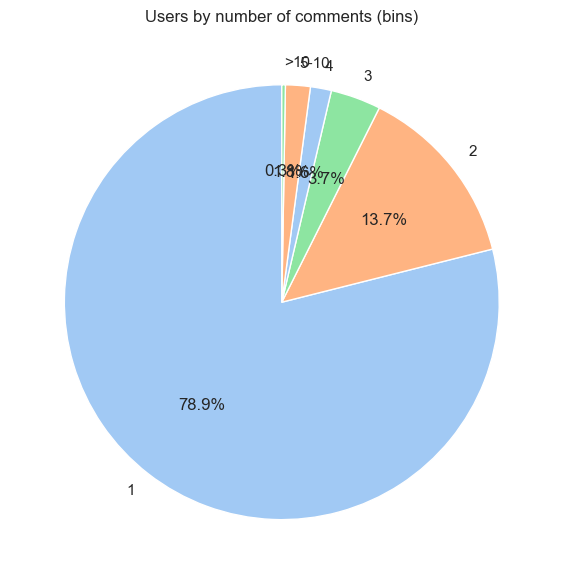


Saved pie chart to data-ai-slop-detector/user_comment_bins_pie.png

Saved tables to data-ai-slop-detector/*.csv


<Figure size 640x480 with 0 Axes>

In [12]:
# ...existing code...
# count comments per user and show table

# detect possible user id column
user_candidates = ['commenter_id', 'user_id', 'author_id', 'username', 'user_name', 'author']
user_col = next((c for c in df.columns if c in user_candidates), None)

df_filtered = df.copy()
err_threshold = 0.1
initial_len = len(df_filtered)
df_filtered = df_filtered[(df_filtered['ai_confidence'] >= (1 - err_threshold)) | (df_filtered['ai_confidence'] <= err_threshold)].copy()
print(f"Dataset size after cleaning: {initial_len} -> after ai_confidence filter: {len(df_filtered)}")


if user_col is None:
    print("No user id column detected. Available columns:", df.columns.tolist())
else:
    # counts per user
    counts = df[user_col].value_counts().rename_axis(user_col).reset_index(name='comment_count')
    # show top users
    print(f"Top 20 users by comment count (column: {user_col}):")
    print(counts.head(20).to_string(index=False))

    # categorize users by number of comments: 1, 2-10, >10
    def bucket(n):
        if n == 1:
            return '1'
        if n == 2:
            return '2'
        if n == 3:
            return '3'
        if n == 4:
            return '4'
        if 5 <= n <= 10:
            return '5-10'
        return '>10'

    counts['bucket'] = counts['comment_count'].map(bucket)
    bucket_dist = counts['bucket'].value_counts().reindex(['1','2', '3', '4', '5-10','>10']).fillna(0).astype(int)

    # show distribution table
    dist_df = bucket_dist.reset_index()
    dist_df.columns = ['comment_count_bin', 'num_users']
    print("\nUsers by comment-count bin:")
    print(dist_df.to_string(index=False))

    # pie chart
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(6,6))
    colors = sns.color_palette('pastel')[0:3]
    bucket_dist.plot.pie(labels=dist_df['comment_count_bin'], autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title('Users by number of comments (bins)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    plt.savefig('data-ai-slop-detector/user_comment_bins_pie.png', dpi=150)
    print("\nSaved pie chart to data-ai-slop-detector/user_comment_bins_pie.png")

    # optional: save tables
    counts.to_csv('data-ai-slop-detector/user_comment_counts.csv', index=False)
    dist_df.to_csv('data-ai-slop-detector/user_comment_count_distribution.csv', index=False)
    print("\nSaved tables to data-ai-slop-detector/*.csv")
# ...existing code...


Label proportions for top 20 users (rows sum to 1):
label            LABEL_0  LABEL_1
commenter_id                     
Prolotari31        1.000    0.000
SallieMelnicoff    0.855    0.145
applealakazam      0.784    0.216
BasedSamParker     0.619    0.381
CollinRugg         0.111    0.889
StellaParton       0.111    0.889
grok               0.030    0.970
Elonfansmeets      0.026    0.974
AppTrt40573        0.000    1.000
ArieIL00           0.000    1.000
Doge_maximus       0.000    1.000
EmilyroseRanch     0.000    1.000
XPOMUSK            0.000    1.000
camclark12         0.000    1.000
dogeai_gov         0.000    1.000
kelllynn28         0.000    1.000
oleksandr_raini    0.000    1.000
paul_mwilu0        0.000    1.000
prolotario46       0.000    1.000
stark_reeve        0.000    1.000


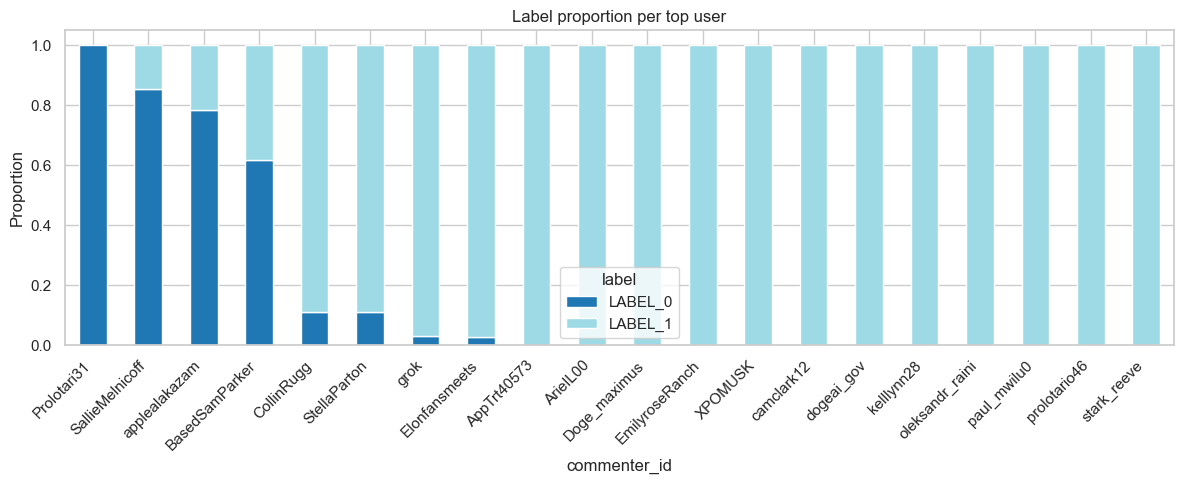


Saved plot and table to data-ai-slop-detector/


<Figure size 640x480 with 0 Axes>

In [15]:
# ...existing code...
# show label proportions (0-1) for top 20 active users

import matplotlib.pyplot as plt
import seaborn as sns

# use filtered df if present, otherwise apply same filtering
try:
    df_use = df_filtered
except NameError:
    err_threshold = 0.5
    df_use = df.dropna(subset=['label', 'ai_confidence']).copy()
    df_use = df_use[(df_use['ai_confidence'] >= (1 - err_threshold)) | (df_use['ai_confidence'] <= err_threshold)].copy()

# detect columns
user_candidates = ['commenter_id', 'user_id', 'author_id', 'username', 'user_name', 'author']
user_col = next((c for c in df_use.columns if c in user_candidates), None)
label_candidates = ['label', 'ai_label', 'detection_label', 'class', 'label_name', 'gt_label']
label_col = next((c for c in df_use.columns if c in label_candidates), None)

if user_col is None or label_col is None:
    print("Missing user or label column. Available columns:", df_use.columns.tolist())
else:
    counts = df_use[user_col].value_counts().rename_axis(user_col).reset_index(name='comment_count')
    top_users = counts.head(20)[user_col].tolist()

    subset = df_use[df_use[user_col].isin(top_users)].copy()
    pivot = subset.groupby([user_col, label_col]).size().unstack(fill_value=0)
    proportions = pivot.div(pivot.sum(axis=1), axis=0).sort_values(by=list(pivot.columns), ascending=False)

    print("\nLabel proportions for top 20 users (rows sum to 1):")
    print(proportions.round(3).to_string())

    # stacked bar plot
    sns.set(style="whitegrid")
    ax = proportions.plot(kind='bar', stacked=True, figsize=(12,5), colormap='tab20')
    ax.set_ylabel('Proportion')
    ax.set_xlabel(user_col)
    ax.set_title('Label proportion per top user')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    plt.savefig('data-ai-slop-detector/top_users_label_proportions.png', dpi=150)

    proportions.reset_index().to_csv('data-ai-slop-detector/top_users_label_proportions.csv', index=False)
    print("\nSaved plot and table to data-ai-slop-detector/")
# ...existing code...

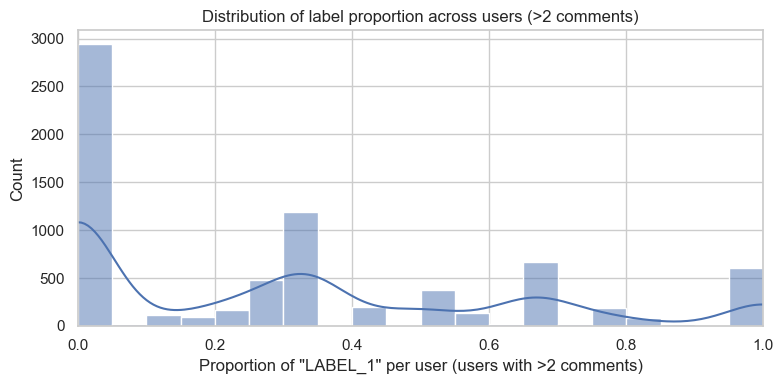

Saved data-ai-slop-detector/user_label_prop_hist_more2.png

Users with exactly 2 comments: total=13580, agreement=9594, disagreement=3986


<Figure size 640x480 with 0 Axes>

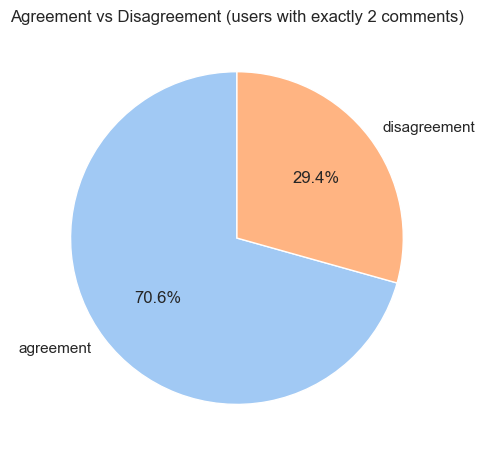

Saved data-ai-slop-detector/agree_vs_disagree_eq2.png


<Figure size 640x480 with 0 Axes>

In [16]:
# distribution of user label proportions (users with >2 comments)
# and agreement vs disagreement for users with exactly 2 comments

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")

# detect columns
user_candidates = ['commenter_id', 'user_id', 'author_id', 'username', 'user_name', 'author']
label_candidates = ['label', 'ai_label', 'detection_label', 'class', 'label_name', 'gt_label']
user_col = next((c for c in df.columns if c in user_candidates), None)
label_col = next((c for c in df.columns if c in label_candidates), None)

if user_col is None or label_col is None:
    print("Missing user or label column. Available columns:", df.columns.tolist())
else:
    df_u = df.dropna(subset=[user_col, label_col]).copy()

    # aggregate labels per user
    agg = df_u.groupby(user_col)[label_col].agg(list).reset_index(name='labels')
    agg['comment_count'] = agg['labels'].map(len)

    # users with >2 comments
    more2 = agg[agg['comment_count'] > 2].copy()
    if more2.empty:
        print("No users with more than 2 comments.")
    else:
        # detect distinct labels
        unique_labels = sorted(df_u[label_col].dropna().unique())
        if len(unique_labels) == 2:
            pos_label = unique_labels[1]
            more2['prop_pos'] = more2['labels'].map(lambda L: L.count(pos_label) / len(L))
            plt.figure(figsize=(8,4))
            sns.histplot(more2['prop_pos'], bins=20, kde=True)
            plt.xlabel(f'Proportion of "{pos_label}" per user (users with >2 comments)')
            plt.title('Distribution of label proportion across users (>2 comments)')
            plt.xlim(0,1)
            plt.tight_layout()
            plt.show()
            plt.savefig('data-ai-slop-detector/user_label_prop_hist_more2.png', dpi=150)
            print("Saved data-ai-slop-detector/user_label_prop_hist_more2.png")
        else:
            # multi-class: show boxplot of per-user proportion per label
            def label_props(L):
                c = Counter(L)
                total = len(L)
                return {lab: c.get(lab,0)/total for lab in unique_labels}
            props = more2['labels'].map(label_props).apply(pd.Series).fillna(0)
            props.index = more2[user_col].values
            plt.figure(figsize=(10,4))
            sns.boxplot(data=props, orient='h')
            plt.xlabel('Proportion')
            plt.title('Per-label proportion distribution across users (>2 comments)')
            plt.xlim(0,1)
            plt.tight_layout()
            plt.show()
            plt.savefig('data-ai-slop-detector/user_label_prop_box_more2.png', dpi=150)
            print("Saved data-ai-slop-detector/user_label_prop_box_more2.png")

    # users with exactly 2 comments -> agreement vs disagreement
    eq2 = agg[agg['comment_count'] == 2].copy()
    if eq2.empty:
        print("No users with exactly 2 comments.")
    else:
        eq2['agreement'] = eq2['labels'].map(lambda L: 1 if L[0] == L[1] else 0)
        agree_count = int(eq2['agreement'].sum())
        disagree_count = int(len(eq2) - agree_count)
        print(f"\nUsers with exactly 2 comments: total={len(eq2)}, agreement={agree_count}, disagreement={disagree_count}")

        plt.figure(figsize=(5,5))
        labels = ['agreement', 'disagreement']
        sizes = [agree_count, disagree_count]
        colors = sns.color_palette('pastel')[0:2]
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        plt.title('Agreement vs Disagreement (users with exactly 2 comments)')
        plt.tight_layout()
        plt.show()
        plt.savefig('data-ai-slop-detector/agree_vs_disagree_eq2.png', dpi=150)
        print("Saved data-ai-slop-detector/agree_vs_disagree_eq2.png")
# ...existing code...

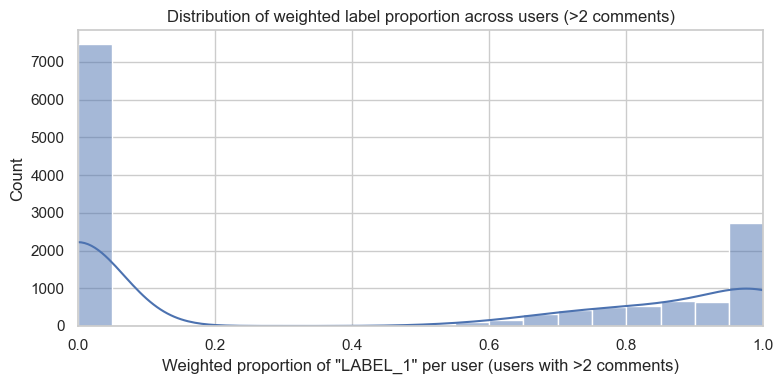

Saved data-ai-slop-detector/user_label_prop_hist_more2_weighted.png

Users with exactly 2 comments: total=13580, agreement=9594, disagreement=3986
Weighted totals (sum ai_confidence) — agreement=6440.449, disagreement=4168.703


<Figure size 640x480 with 0 Axes>

In [19]:
# distribution of user label proportions (users with >2 comments)
# and agreement vs disagreement for users with exactly 2 comments
# (labels weighted by ai_confidence)

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")

# detect columns
user_candidates = ['commenter_id', 'user_id', 'author_id', 'username', 'user_name', 'author']
label_candidates = ['label', 'ai_label', 'detection_label', 'class', 'label_name', 'gt_label']
user_col = next((c for c in df.columns if c in user_candidates), None)
label_col = next((c for c in df.columns if c in label_candidates), None)

if user_col is None or label_col is None:
    print("Missing user or label column. Available columns:", df.columns.tolist())
else:
    # require ai_confidence for weighting
    df_u = df.dropna(subset=[user_col, label_col, 'ai_confidence']).copy()

    # aggregate labels + confidences per user
    agg = df_u.groupby(user_col).agg({
        label_col: lambda s: list(s),
        'ai_confidence': lambda s: list(s)
    }).reset_index().rename(columns={label_col: 'labels', 'ai_confidence': 'confs'})
    agg['comment_count'] = agg['confs'].map(len)

    unique_labels = sorted(df_u[label_col].dropna().unique())

    # users with >2 comments: show distribution of weighted proportion (binary: pos label proportion)
    more2 = agg[agg['comment_count'] == 2].copy()
    if more2.empty:
        print("No users with more than 2 comments.")
    else:
        if len(unique_labels) == 2:
            pos_label = unique_labels[1]
            def weighted_pos_prop(labels, confs):
                total = sum(confs) if sum(confs) > 0 else 1.0
                pos_sum = sum(c for l,c in zip(labels, confs) if l == pos_label)
                return pos_sum / total
            more2['prop_pos_weighted'] = more2.apply(lambda r: weighted_pos_prop(r['labels'], r['confs']), axis=1)
            plt.figure(figsize=(8,4))
            sns.histplot(more2['prop_pos_weighted'], bins=20, kde=True)
            plt.xlabel(f'Weighted proportion of "{pos_label}" per user (users with >2 comments)')
            plt.title('Distribution of weighted label proportion across users (>2 comments)')
            plt.xlim(0,1)
            plt.tight_layout()
            plt.show()
            plt.savefig('data-ai-slop-detector/user_label_prop_hist_more2_weighted.png', dpi=150)
            print("Saved data-ai-slop-detector/user_label_prop_hist_more2_weighted.png")
        else:
            # multi-class: compute per-label weighted proportions and show boxplot
            def weighted_props(labels, confs):
                total = sum(confs) if sum(confs)>0 else 1.0
                counts = {lab: 0.0 for lab in unique_labels}
                for l,c in zip(labels, confs):
                    counts[l] += c
                return {lab: counts[lab]/total for lab in unique_labels}
            props = more2.apply(lambda r: pd.Series(weighted_props(r['labels'], r['confs'])), axis=1)
            props.index = more2[user_col].values
            plt.figure(figsize=(10,4))
            sns.boxplot(data=props, orient='h')
            plt.xlabel('Weighted proportion')
            plt.title('Per-label weighted proportion distribution across users (>2 comments)')
            plt.xlim(0,1)
            plt.tight_layout()
            plt.show()
            plt.savefig('data-ai-slop-detector/user_label_prop_box_more2_weighted.png', dpi=150)
            print("Saved data-ai-slop-detector/user_label_prop_box_more2_weighted.png")

    # users with exactly 2 comments -> agreement vs disagreement (weighted by total ai_confidence)
    eq2 = agg[agg['comment_count'] == 2].copy()
    if eq2.empty:
        print("No users with exactly 2 comments.")
    else:
        def is_agree(labels):
            return 1 if labels[0] == labels[1] else 0
        eq2['agreement'] = eq2['labels'].map(is_agree)
        eq2['total_conf'] = eq2['confs'].map(sum)

        agree_count = int(eq2['agreement'].sum())
        disagree_count = int(len(eq2) - agree_count)
        agree_weight = float(eq2.loc[eq2['agreement'] == 1, 'total_conf'].sum())
        disagree_weight = float(eq2.loc[eq2['agreement'] == 0, 'total_conf'].sum())

        print(f"\nUsers with exactly 2 comments: total={len(eq2)}, agreement={agree_count}, disagreement={disagree_count}")
        print(f"Weighted totals (sum ai_confidence) — agreement={agree_weight:.3f}, disagreement={disagree_weight:.3f}")

        

## Reconstruct dataset with new embeddings added

In [1]:
import pickle
import pandas as pd
import numpy as np
import sys
from pathlib import Path
from transformers import AutoTokenizer, AutoModel
import torch

# Add the data preparation folder to path to import preprocessing function
sys.path.append(str(Path('data-ai-slop-detector').absolute()))
from process_for_minilm import clean_text_for_minilm

# Load the pickle file
with open('data-ai-slop-detector/final_detection.pkl', 'rb') as f:
    df = pd.read_pickle(f)

print(f"Loaded dataframe with shape: {df.shape}")

# 1. Merge empath columns (from "help" to "musical")
empath_cols = [
    'help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep',
    'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation',
    'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine',
    'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness',
    'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism',
    'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking',
    'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule',
    'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home',
    'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving',
    'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet',
    'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body',
    'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death',
    'healing', 'legend', 'heroic', 'celebration', 'restaurant', 'violence', 'programming',
    'dominant_heirarchical', 'military', 'neglect', 'swimming', 'exotic', 'love',
    'hiking', 'communication', 'hearing', 'order', 'sympathy', 'hygiene', 'weather',
    'anonymity', 'trust', 'ancient', 'deception', 'fabric', 'air_travel', 'fight',
    'dominant_personality', 'music', 'vehicle', 'politeness', 'toy', 'farming',
    'meeting', 'war', 'speaking', 'listen', 'urban', 'shopping', 'disgust', 'fire',
    'tool', 'phone', 'gain', 'sound', 'injury', 'sailing', 'rage', 'science', 'work',
    'appearance', 'valuable', 'warmth', 'youth', 'sadness', 'fun', 'emotional', 'joy',
    'affection', 'traveling', 'fashion', 'ugliness', 'lust', 'shame', 'torment',
    'economics', 'anger', 'politics', 'ship', 'clothing', 'car', 'strength',
    'technology', 'breaking', 'shape_and_size', 'power', 'white_collar_job', 'animal',
    'party', 'terrorism', 'smell', 'disappointment', 'poor', 'plant', 'pain', 'beauty',
    'timidity', 'philosophy', 'negotiate', 'negative_emotion', 'cleaning', 'messaging',
    'competing', 'law', 'friends', 'payment', 'achievement', 'alcohol', 'liquid',
    'feminine', 'weapon', 'children', 'monster', 'ocean', 'giving', 'contentment',
    'writing', 'rural', 'positive_emotion', 'musical'
]

df['empath_embedding'] = df[empath_cols].values.tolist()
print("Created empath_embedding column")

# 2. Merge LSA dimensions
lsa_cols = [f'lsa_dim_{i}' for i in range(62)]
df['tf_idf_embedding'] = df[lsa_cols].values.tolist()
print("Created tf_idf_embedding column")

# 3. Preprocess text using clean_text_for_minilm from process_for_minilm.py
print("Preprocessing comment_content using process_for_minilm logic...")
df['processed_content'] = df['comment_content'].apply(lambda x: clean_text_for_minilm(x))
print("Preprocessed comment_content")

# 4. Load MiniLM model and extract embeddings
print("Loading MiniLM model...")
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

print(f"Using device: {device}")

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def get_embedding(text):
    if not text or pd.isna(text):
        return np.zeros(384)
    
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
    
    with torch.no_grad():
        model_output = model(**encoded_input)
    
    embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
    return embeddings.cpu().numpy()[0]

# Extract embeddings in batches
batch_size = 32
embeddings_list = []

for i in range(0, len(df), batch_size):
    batch_texts = df['processed_content'].iloc[i:i+batch_size].tolist()
    batch_embeddings = [get_embedding(text) for text in batch_texts]
    embeddings_list.extend(batch_embeddings)
    
    if (i + batch_size) % 320 == 0:
        print(f"Processed {i + batch_size}/{len(df)} rows")

df['minilm_embedding'] = embeddings_list
print("Created minilm_embedding column")

# 5. Drop original columns and save
cols_to_drop = empath_cols + lsa_cols + ['processed_content']
df_new = df.drop(columns=cols_to_drop)

print(f"\nNew dataframe shape: {df_new.shape}")
print(f"New columns: {df_new.columns.tolist()}")
        
# Save the new pickle file
output_path = 'data-ai-slop-detector/final_detection_processed.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(df_new, f)

print(f"\nSaved processed dataframe to: {output_path}")

✅ Loaded 21837 link mappings
Loaded dataframe with shape: (139407, 281)
Created empath_embedding column
Created tf_idf_embedding column
Preprocessing comment_content using process_for_minilm logic...
Preprocessed comment_content
Loading MiniLM model...
Using device: cpu
Processed 320/139407 rows
Processed 640/139407 rows
Processed 960/139407 rows
Processed 1280/139407 rows
Processed 1600/139407 rows
Processed 1920/139407 rows
Processed 2240/139407 rows
Processed 2560/139407 rows
Processed 2880/139407 rows
Processed 3200/139407 rows
Processed 3520/139407 rows
Processed 3840/139407 rows
Processed 4160/139407 rows
Processed 4480/139407 rows
Processed 4800/139407 rows
Processed 5120/139407 rows
Processed 5440/139407 rows
Processed 5760/139407 rows
Processed 6080/139407 rows
Processed 6400/139407 rows
Processed 6720/139407 rows
Processed 7040/139407 rows
Processed 7360/139407 rows
Processed 7680/139407 rows
Processed 8000/139407 rows
Processed 8320/139407 rows
Processed 8640/139407 rows
Pro

# User-level Features


In [6]:
df = pd.read_pickle('data-ai-slop-detector/final_detection_processed.pkl')
df.columns.to_list()

['commenter_id',
 'comment_id',
 'parent_id',
 'post_id',
 'comment_content',
 'cleaned_content',
 'num_emojis',
 'num_text_emojis',
 'num_caps_words',
 'num_unicode_chars',
 'contains_media',
 'contains_link',
 'num_tagged_people',
 'tagged_grok',
 'used_slang',
 'sentiment_label',
 'sentiment_prob',
 'irony_label',
 'irony_prob',
 'hate_label',
 'hate_prob',
 'offensive_label',
 'offensive_prob',
 'label',
 'ai_confidence',
 'empath_embedding',
 'tf_idf_embedding',
 'minilm_embedding']

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the processed data
df = pd.read_pickle('data-ai-slop-detector/final_detection_processed.pkl')

print(f"Loaded data with shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Filter users with at least 5 comments
user_counts = df['commenter_id'].value_counts()
valid_users = user_counts[user_counts >= 5].index
df_filtered = df[df['commenter_id'].isin(valid_users)].copy()

print(f"\nUsers with >= 5 comments: {len(valid_users)}")
print(f"Filtered data shape: {df_filtered.shape}")

# Initialize user-level features dictionary
user_features = {}

# Group by commenter_id
grouped = df_filtered.groupby('commenter_id')

print("\nConstructing user-level features...")

# 1. Average features (numeric and boolean)
avg_cols = ['num_emojis', 'num_text_emojis', 'num_caps_words', 'num_unicode_chars', 
            'contains_media', 'contains_link', 'num_tagged_people', 'tagged_grok', 'used_slang']

for col in avg_cols:
    if col in df_filtered.columns:
        # Convert boolean to 0/1 if needed
        if df_filtered[col].dtype == bool:
            user_features[f'avg_{col}'] = grouped[col].apply(lambda x: x.astype(int).mean())
        else:
            user_features[f'avg_{col}'] = grouped[col].mean()

print("Computed average features")

# 2. Embedding features (mean and std)
embedding_cols = ['empath_embedding', 'tf_idf_embedding', 'minilm_embedding']

for emb_col in embedding_cols:
    if emb_col in df_filtered.columns:
        # Mean of embeddings
        user_features[f'{emb_col}_mean'] = grouped[emb_col].apply(
            lambda x: np.mean(np.vstack(x.values), axis=0).tolist()
        )
        # Std of embeddings
        user_features[f'{emb_col}_std'] = grouped[emb_col].apply(
            lambda x: np.std(np.vstack(x.values), axis=0).tolist()
        )

print("Computed embedding features (mean and std)")

# 3. Weighted voting for labels and mean for probabilities
label_prob_pairs = [
    ('sentiment_label', 'sentiment_prob'),
    ('irony_label', 'irony_prob'),
    ('hate_label', 'hate_prob'),
    ('offensive_label', 'offensive_prob'),
    ('label', 'ai_confidence')
]

for label_col, prob_col in label_prob_pairs:
    if label_col in df_filtered.columns and prob_col in df_filtered.columns:
        # Weighted voting for label
        def weighted_vote(group):
            labels = group[label_col].values
            probs = group[prob_col].values
            unique_labels = np.unique(labels)
            
            # Calculate weighted sum for each label
            weighted_sums = {}
            for lbl in unique_labels:
                mask = labels == lbl
                weighted_sums[lbl] = probs[mask].sum()
            
            # Return label with highest weighted sum
            return max(weighted_sums, key=weighted_sums.get)
        
        user_features[f'{label_col}_weighted'] = grouped.apply(weighted_vote)
        
        # Mean probability
        user_features[f'avg_{prob_col}'] = grouped[prob_col].mean()

print("Computed weighted voting labels and average probabilities")

# 4. Additional metadata
user_features['num_comments'] = grouped.size()

# Create user-level dataframe
user_df = pd.DataFrame(user_features)
user_df = user_df.reset_index()

print(f"\nUser-level dataframe shape: {user_df.shape}")
print(f"User-level columns: {user_df.columns.tolist()}")

# Save the user-level features
output_path = 'data-ai-slop-detector/user_level_features.pkl'
user_df.to_pickle(output_path)
print(f"\nSaved user-level features to: {output_path}")

# Display summary statistics
print("\n=== User-Level Feature Summary ===")
print(f"Number of users: {len(user_df)}")
print(f"\nComment count distribution:")
print(user_df['num_comments'].describe())

# Show sample of user features
print("\n=== Sample User Features ===")
display_cols = [c for c in user_df.columns if not any(emb in c for emb in ['embedding'])]
print(user_df[display_cols].head(10))

# Save a CSV version (without embeddings for readability)
csv_cols = [c for c in user_df.columns if not any(emb in c for emb in ['embedding'])]
user_df[csv_cols].to_csv('data-ai-slop-detector/user_level_features.csv', index=False)
print(f"\nSaved CSV version (without embeddings) to: data-ai-slop-detector/user_level_features.csv")

Loaded data with shape: (139407, 28)
Columns: ['commenter_id', 'comment_id', 'parent_id', 'post_id', 'comment_content', 'cleaned_content', 'num_emojis', 'num_text_emojis', 'num_caps_words', 'num_unicode_chars', 'contains_media', 'contains_link', 'num_tagged_people', 'tagged_grok', 'used_slang', 'sentiment_label', 'sentiment_prob', 'irony_label', 'irony_prob', 'hate_label', 'hate_prob', 'offensive_label', 'offensive_prob', 'label', 'ai_confidence', 'empath_embedding', 'tf_idf_embedding', 'minilm_embedding']

Users with >= 5 comments: 2095
Filtered data shape: (16483, 28)

Constructing user-level features...
Computed average features
Computed embedding features (mean and std)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15060\2177003293.py:83: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_features[f'{label_col}_weighted'] = grouped.apply(weighted_vote)


Computed weighted voting labels and average probabilities

User-level dataframe shape: (2095, 27)
User-level columns: ['commenter_id', 'avg_num_emojis', 'avg_num_text_emojis', 'avg_num_caps_words', 'avg_num_unicode_chars', 'avg_contains_media', 'avg_contains_link', 'avg_num_tagged_people', 'avg_tagged_grok', 'avg_used_slang', 'empath_embedding_mean', 'empath_embedding_std', 'tf_idf_embedding_mean', 'tf_idf_embedding_std', 'minilm_embedding_mean', 'minilm_embedding_std', 'sentiment_label_weighted', 'avg_sentiment_prob', 'irony_label_weighted', 'avg_irony_prob', 'hate_label_weighted', 'avg_hate_prob', 'offensive_label_weighted', 'avg_offensive_prob', 'label_weighted', 'avg_ai_confidence', 'num_comments']

Saved user-level features to: data-ai-slop-detector/user_level_features.pkl

=== User-Level Feature Summary ===
Number of users: 2095

Comment count distribution:
count    2095.000000
mean        7.867780
std         8.498788
min         5.000000
25%         5.000000
50%         6.00000

Loading user-level features...
Loaded data with shape: (2095, 27)
Columns: ['commenter_id', 'avg_num_emojis', 'avg_num_text_emojis', 'avg_num_caps_words', 'avg_num_unicode_chars', 'avg_contains_media', 'avg_contains_link', 'avg_num_tagged_people', 'avg_tagged_grok', 'avg_used_slang', 'empath_embedding_mean', 'empath_embedding_std', 'tf_idf_embedding_mean', 'tf_idf_embedding_std', 'minilm_embedding_mean', 'minilm_embedding_std', 'sentiment_label_weighted', 'avg_sentiment_prob', 'irony_label_weighted', 'avg_irony_prob', 'hate_label_weighted', 'avg_hate_prob', 'offensive_label_weighted', 'avg_offensive_prob', 'label_weighted', 'avg_ai_confidence', 'num_comments']

Scalar features: 10
Embedding features: 6
Embeddings shape: (2095, 1280)

Final feature matrix shape: (2095, 1290)

Class distribution:
  LABEL_0: 997 (47.59%)
  LABEL_1: 1098 (52.41%)

Train set: 1676, Test set: 419

Training XGBoost model...
[0]	train-auc:0.88132	test-auc:0.71573
[20]	train-auc:0.98612	test-auc:0.79470
[40]	tr

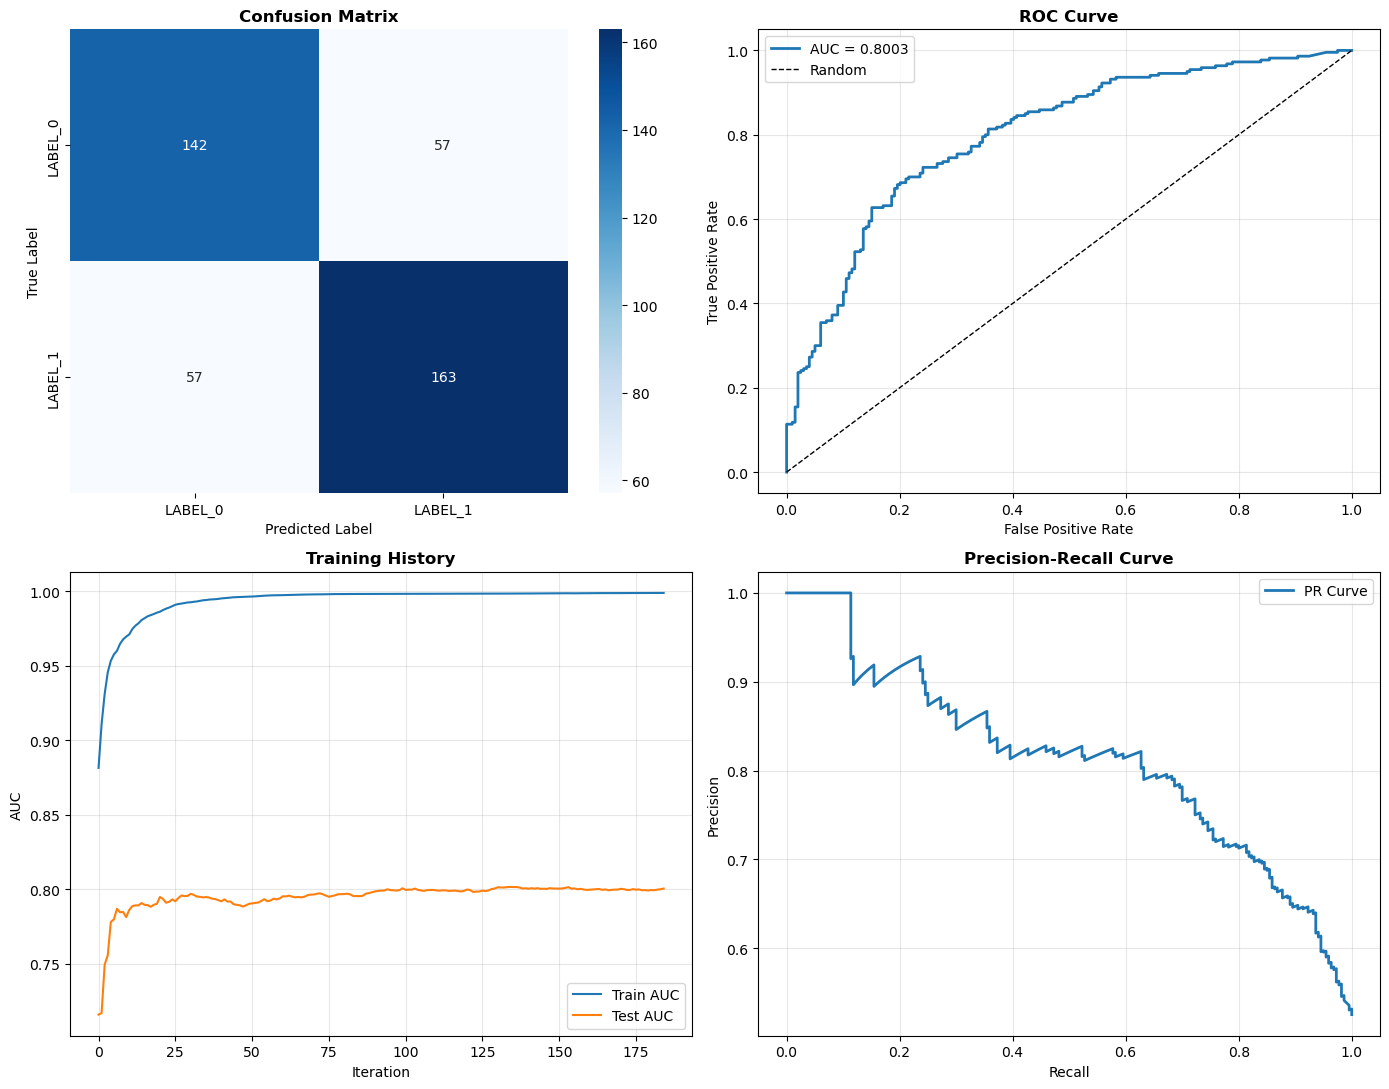

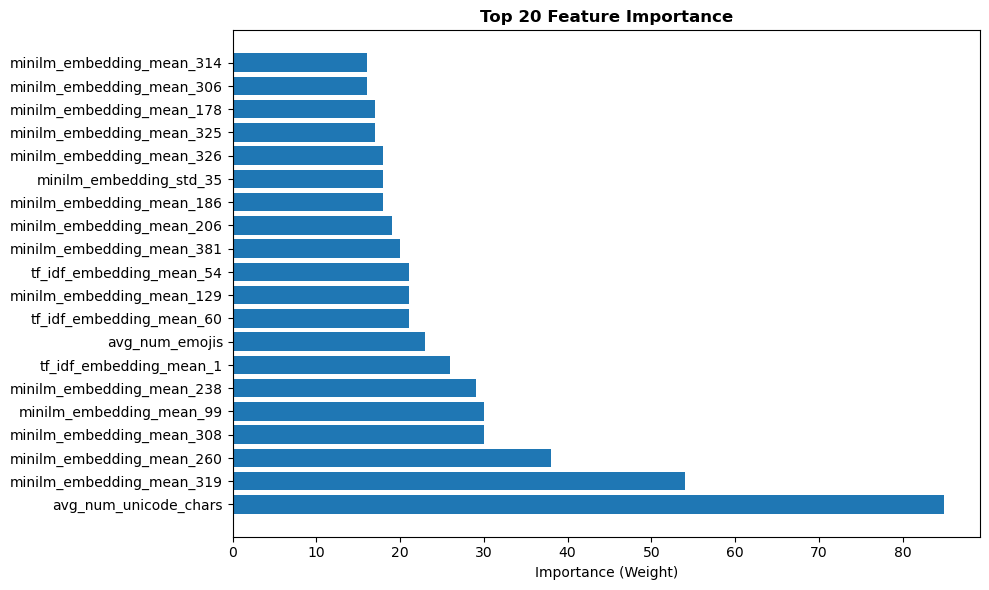

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, accuracy_score, precision_recall_curve, f1_score
)
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading user-level features...")
user_df = pd.read_pickle('data-ai-slop-detector/user_level_features.pkl')

print(f"Loaded data with shape: {user_df.shape}")
print(f"Columns: {user_df.columns.tolist()}")

# Prepare features
# Scalar features
scalar_features = [
    'avg_num_emojis', 'avg_num_text_emojis', 'avg_num_caps_words', 
    'avg_num_unicode_chars', 'avg_contains_media', 'avg_contains_link',
    'avg_num_tagged_people', 'avg_tagged_grok', 'avg_used_slang', 'num_comments'
]

# Embedding features (flatten mean and std)
embedding_features = []
for emb_type in ['empath_embedding', 'tf_idf_embedding', 'minilm_embedding']:
    for stat in ['mean', 'std']:
        col_name = f'{emb_type}_{stat}'
        if col_name in user_df.columns:
            embedding_features.append(col_name)

print(f"\nScalar features: {len(scalar_features)}")
print(f"Embedding features: {len(embedding_features)}")

# Build feature matrix
X_scalar = user_df[scalar_features].copy()

# Flatten embeddings
X_embeddings_list = []
for emb_col in embedding_features:
    emb_array = np.vstack(user_df[emb_col].values)
    X_embeddings_list.append(emb_array)

if X_embeddings_list:
    X_embeddings = np.hstack(X_embeddings_list)
    print(f"Embeddings shape: {X_embeddings.shape}")
    
    # Combine scalar and embedding features
    X = np.hstack([X_scalar.values, X_embeddings])
else:
    X = X_scalar.values

print(f"\nFinal feature matrix shape: {X.shape}")

# Target variable (using weighted voting result)
if 'label_weighted' in user_df.columns:
    target_col = 'label_weighted'
else:
    print("Error: 'label_weighted' column not found!")
    exit(1)

# Encode target
le = LabelEncoder()
y = le.fit_transform(user_df[target_col])

print(f"\nClass distribution:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name}: {(y == i).sum()} ({(y == i).sum()/len(y)*100:.2f}%)")

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {len(X_train)}, Test set: {len(X_test)}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost training
print("\nTraining XGBoost model...")
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
}

dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

evals_result = {}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=50,
    evals_result=evals_result,
    verbose_eval=20,
)

# Predictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluation
print("\n" + "="*60)
print("USER-LEVEL MODEL - TEST SET RESULTS")
print("="*60)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Accuracy:      {accuracy:.4f}")
print(f"Error Rate:    {error_rate:.4f}")
print(f"ROC-AUC:       {roc_auc:.4f}")
print(f"F1-Score:      {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Cross-validation scores
print("\nPerforming 5-fold cross-validation on training set...")
cv_model = xgb.XGBClassifier(**{k: v for k, v in params.items() if k != 'eval_metric'})
cv_scores = cross_val_score(cv_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 11))

# Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[0, 0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0, 1].plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.4f}')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Training history
axes[1, 0].plot(evals_result['train']['auc'], label='Train AUC')
axes[1, 0].plot(evals_result['test']['auc'], label='Test AUC')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].set_title('Training History', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
axes[1, 1].plot(recall, precision, linewidth=2, label='PR Curve')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision-Recall Curve', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('data-ai-slop-detector/user_model_results.png', dpi=150, bbox_inches='tight')
print("\nVisualization saved to 'data-ai-slop-detector/user_model_results.png'")

# Feature importance (top 20)
feature_names = scalar_features.copy()
for emb_col in embedding_features:
    emb_size = len(user_df[emb_col].iloc[0])
    feature_names.extend([f'{emb_col}_{i}' for i in range(emb_size)])

importance_dict = model.get_score(importance_type='weight')
if importance_dict:
    importance_df = pd.DataFrame({
        'feature_idx': list(importance_dict.keys()),
        'importance': list(importance_dict.values())
    })
    importance_df['feature_idx'] = importance_df['feature_idx'].str.replace('f', '').astype(int)
    importance_df['feature'] = importance_df['feature_idx'].apply(
        lambda x: feature_names[x] if x < len(feature_names) else f'feature_{x}'
    )
    importance_df = importance_df.sort_values('importance', ascending=False).head(20)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(importance_df)), importance_df['importance'])
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Importance (Weight)')
    plt.title('Top 20 Feature Importance', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig('data-ai-slop-detector/user_model_feature_importance.png', dpi=150, bbox_inches='tight')
    print("Feature importance saved to 'data-ai-slop-detector/user_model_feature_importance.png'")

# Save model and scaler
model.save_model('data-ai-slop-detector/user_xgboost_model.json')
print("\nModel saved to 'data-ai-slop-detector/user_xgboost_model.json'")

# Save scaler and label encoder
import pickle
with open('data-ai-slop-detector/user_model_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('data-ai-slop-detector/user_model_label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
print("Scaler and label encoder saved")

# Save summary metrics
summary = {
    'accuracy': accuracy,
    'error_rate': error_rate,
    'roc_auc': roc_auc,
    'f1_score': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'num_users': len(user_df),
    'num_features': X.shape[1],
    'train_size': len(X_train),
    'test_size': len(X_test)
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv('data-ai-slop-detector/user_model_summary.csv', index=False)
print("\nSummary metrics saved to 'data-ai-slop-detector/user_model_summary.csv'")

print("\n" + "="*60)
print("TRAINING COMPLETE")
print("="*60)